In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [ ]:
total

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,8,802,D080204,아이메이크업,아이섀도우,일상용품,229784,18799,24,20150805,15,9900,1,2,1.0,2015,저가,7,D
28593026,8,803,D080301,립메이크업,립스틱/립라이너,일상용품,230365,18799,24,20151203,16,11200,1,2,1.0,2015,저가,8,D
28593027,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229653,18799,24,20150618,16,7200,1,2,1.0,2015,저가,6,D
28593028,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229670,18799,24,20150625,14,9000,1,2,1.0,2015,저가,6,D


## 추천프로그램

데이터를 다집어넣고 돌리면 램터져서 2015년 데이터만 가지고 시뮬레이션 돌림

In [ ]:
# 데이터 불러오기
import pandas as pd
total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv',index_col=0)

In [ ]:
# 필요한 데이터 그룹화
df = total.groupby(['고객번호','소분류코드','소분류명','구매일자'])['영수증번호'].nunique().reset_index()

In [ ]:
# 구매감소모델 돌린결과
pred = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/prediction1.csv')
pred

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810,0,0.72
1,2,0,2,6,0,3,0,2,4,5,...,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226,0,0.53
2,3,0,1,6,0,0,0,1,2,1,...,0.0,1.8,0.8,0.4,0.0,4.2,0,5.648077,1,0.80
3,4,1,1,6,0,2,0,4,3,3,...,4.2,11.2,4.0,3.2,5.2,7.4,0,8.419210,1,0.87
4,6,1,4,6,0,0,0,4,5,4,...,1.2,1.8,0.6,6.6,1.8,8.0,1,8.419641,1,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-13.772816,0,0.63
18862,19334,0,7,3,1,3,0,1,3,2,...,7.6,3.6,0.6,0.8,4.6,4.2,0,-8.642034,1,0.51
18863,19335,1,14,3,1,0,0,3,3,3,...,0.8,1.6,4.6,3.2,2.8,0.8,1,8.779073,1,0.87
18864,19336,1,1,3,0,0,0,1,1,4,...,8.6,0.0,2.6,7.6,4.0,0.0,1,55.360192,1,0.97


In [ ]:
# 감소고객으로 분류된고객 
predict=pred[pred['Label']==0]
predict

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810,0,0.72
1,2,0,2,6,0,3,0,2,4,5,...,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226,0,0.53
5,7,1,1,6,0,1,1,2,2,5,...,5.0,1.2,-1.4,0.4,0.0,1.4,1,-17.638567,0,0.74
6,8,0,1,6,0,2,0,4,4,5,...,10.2,10.2,3.2,5.8,7.0,1.8,1,3.297967,0,0.50
8,10,1,1,6,0,0,0,3,5,3,...,2.2,1.2,0.0,4.6,4.2,-1.8,0,-2.592876,0,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18838,19307,1,2,4,0,3,0,2,3,2,...,0.0,-0.6,-0.2,1.2,0.0,0.0,1,-1.948156,0,0.57
18845,19314,1,1,4,1,0,0,1,3,5,...,0.4,6.8,-0.2,0.4,1.0,1.2,0,-11.946349,0,0.95
18854,19325,1,12,4,0,0,0,2,3,3,...,5.8,-1.8,2.8,4.6,4.4,1.8,0,-9.067570,0,0.59
18855,19327,0,1,5,1,0,0,1,5,1,...,-0.8,2.2,-2.2,0.0,2.4,4.2,0,-9.532850,0,0.69


In [ ]:
# 감소고객 고객번호
cus_id=predict.고객번호.unique().tolist()

In [ ]:
# 감소고객을 대상으로 선정
df=df[df['고객번호'].isin(cus_id)]
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호
0,1,A010101,위생세제,20140130,1
1,1,A010101,위생세제,20140228,1
2,1,A010101,위생세제,20140919,1
3,1,A010101,위생세제,20150327,1
4,1,A010101,위생세제,20151130,1
...,...,...,...,...,...
27687502,19333,D040109,쿠키,20150925,1
27687503,19333,D040201,생수,20150424,1
27687504,19333,D040201,생수,20151112,1
27687505,19333,D040209,기타기능성음료,20150123,1


In [ ]:
# 2015년 데이터만 추출
df=df.query('구매일자 > 20141231 and 구매일자 <20151232')
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호
3,1,A010101,위생세제,20150327,1
4,1,A010101,위생세제,20151130,1
7,1,A010103,뷰티상품,20151230,1
8,1,A010104,일용잡화,20150327,1
11,1,A010106,단기행사,20150426,1
...,...,...,...,...,...
27687502,19333,D040109,쿠키,20150925,1
27687503,19333,D040201,생수,20150424,1
27687504,19333,D040201,생수,20151112,1
27687505,19333,D040209,기타기능성음료,20150123,1


In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
# 11월 이전 이후로 데이터 나누기
df_year_round = df[df['구매일자'] < 20151101]
df_year_end = df[df['구매일자'] > 20151031]

In [ ]:
# 점수를 매기기위해 그룹화
uir_df=df_year_round.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
uir_df

,고객번호,소분류명,영수증번호
0,1,Bag&Bag,1
1,1,L.B,1
2,1,L/C 아웃도어,1
3,1,N.B,1
4,1,VIC마켓피자,2
...,...,...,...
1531874,19333,한식델리,1
1531875,19333,햄,1
1531876,19333,헬스건강,1
1531877,19333,혼합탄산,1


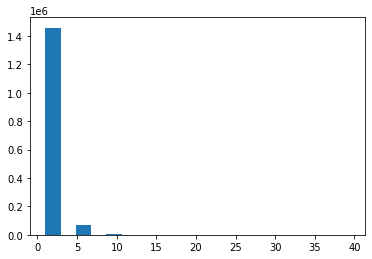

In [ ]:
# 정규화후 1~5 사이의 점수로 변환한다.
import numpy as np
uir_df['점수'] = uir_df['영수증번호'].apply(lambda x: np.log10(x)+1)
uir_df['점수'] = ((uir_df['영수증번호'] - uir_df['점수'].min()) / 
                    (uir_df['점수'].max() - uir_df['점수'].min()) * 4) + 1
uir_df['점수'].hist(bins=20, grid=False)

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626460 sha256=dee4c6eef62647f9b4df0ad8862fe93e1a253c11f15aaba01be9ff78e9bd7aab
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [ ]:
# 2015년 11월 이전 데이터를 trainset 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['고객번호', '소분류명', '점수']], reader)
train_data = data.build_full_trainset()

# SVD 모델학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()

In [ ]:
# 이전에 구매하지 않았던 상품
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

In [ ]:
# 이전에 구매하지 않았던 상품 딕셔너리
new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating
                
print(str(new_order_prediction_dict)[:300] + "...")

{1: {'L/C골프의류': 1, 'N/B 아동복': 1.9461063302032093, 'N/B골프의류': 1.5633411187507646, '건강식품(비타민)': 3.0341679293650343, '건과': 1.3109177117805586, '건어물류': 1.4113103567131717, '곡물': 1.343779032393494, '관상어': 1.3463125573194838, '관상어용품': 1.2159305934351532, '국산A/V': 1.6504609689065968, '국산주방': 1.303384299848...


In [ ]:
# 이전에 구매했었던 상품
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

In [ ]:
# 이전에 구매했었던 상품 딕셔너리 
reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{1: {'Bag&Bag': 1.1559524003098378, 'L.B': 1.5537311795772886, 'L/C 아웃도어': 1.9784219263589382, 'N.B': 1.3929338281044625, 'VIC마켓피자': 1.9248061293222924, 'VIC피자': 1.833804092885142, 'global SPA': 3.1103932564380465, '가공우유': 1.069589474700542, '가방': 1.4059874738286675, '간편과일': 1.1409519691637873, '감자스...


In [ ]:
# 두 딕셔너리를 하나로 통합
total_prediction_dict = {}


for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            

for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

{1: {'L/C골프의류': 1, 'N/B 아동복': 1.9461063302032093, 'N/B골프의류': 1.5633411187507646, '건강식품(비타민)': 3.0341679293650343, '건과': 1.3109177117805586, '건어물류': 1.4113103567131717, '곡물': 1.343779032393494, '관상어': 1.3463125573194838, '관상어용품': 1.2159305934351532, '국산A/V': 1.6504609689065968, '국산주방': 1.303384299848...


In [ ]:
# 11월 이후의 데이터 -> 테스트로 활용
simulation_test_df = df_year_end.groupby('고객번호')['소분류명'].apply(set).reset_index()
simulation_test_df.columns = ['cus_id', 'RealOrdered']
simulation_test_df.head()

,cus_id,RealOrdered
0,1,"{베이컨, 영캐주얼, 숙녀고정행사, 딸기, 조미도시락김, 제과제빵, 마늘, 매일통상..."
1,2,"{건강식품, 국산주방, 수입주방, 한식델리, 기초 화장품, 장갑(특정), 서양델리,..."
2,7,"{시계, 기타냉장조리, 제과제빵, 에스닉푸드, 수입주방, 한식델리, 일식델리, 수입..."
3,8,"{제과제빵, 수입주방, 한식델리, 기초 화장품, 떡, 선식(가루류), 식당가 일식,..."
4,10,"{마시는요구르트, 산지한우, 순면생리대, 국산돼지갈비, 즉석반찬원부재료, 대파, 오..."


In [ ]:
#시뮬레이션 결과 추가
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

# 상품 추천 시뮬레이션 결과를 추가
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()                            

,cus_id,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,1,"{베이컨, 영캐주얼, 숙녀고정행사, 딸기, 조미도시락김, 제과제빵, 마늘, 매일통상...","[아동놀이시설, 푸드엠파이어, 타이틀리스트, JDX골프, 미시, 일반화장품, 정육세...","[영 캐릭터, 기초 화장품, 커리어, 트래디셔널, 캐릭터캐주얼, 청과, 영캐주얼, ...","[아동놀이시설, 푸드엠파이어, 타이틀리스트, 영 캐릭터, 기초 화장품, 커리어, J..."
1,2,"{건강식품, 국산주방, 수입주방, 한식델리, 기초 화장품, 장갑(특정), 서양델리,...","[L/C 아웃도어, 푸드캐피탈, 에이글, 지방스넥(부대), 잡화멀티샵, 친환경세트,...","[기초 화장품, 엘레강스, 유기농채소, N/B 아동복, 수입주방, 디자이너부틱, L...","[L/C 아웃도어, 푸드캐피탈, 에이글, 기초 화장품, 엘레강스, 지방스넥(부대),..."
2,7,"{시계, 기타냉장조리, 제과제빵, 에스닉푸드, 수입주방, 한식델리, 일식델리, 수입...","[유원시설, 아동놀이시설, 남성해외패션, VIC마켓피자, 트래디셔널, 골프캐주얼, ...","[기초 화장품, 시니어, 커리어, 수입식품, 엘레강스, 브랜드샵, 청과, 스포츠의류...","[유원시설, 아동놀이시설, 남성해외패션, 기초 화장품, VIC마켓피자, 트래디셔널,..."
3,8,"{제과제빵, 수입주방, 한식델리, 기초 화장품, 떡, 선식(가루류), 식당가 일식,...","[디자이너부틱, 생활잡화균일가, 엘레강스, 캐릭터캐주얼, 수입의류, 주유소, 브랜드...","[global SPA, 건강식품(비타민), 기초 화장품, 농산가공, 수입식품, 유제...","[디자이너부틱, 생활잡화균일가, 엘레강스, 캐릭터캐주얼, 수입의류, 주유소, 브랜드..."
4,10,"{마시는요구르트, 산지한우, 순면생리대, 국산돼지갈비, 즉석반찬원부재료, 대파, 오...","[유원시설, 영플라자 (올리브핫스텁), VIC마켓피자, 직수입 골프의류, 수입캐릭터...","[영플라자(기타), 재사용봉투, 일반계란, 두부류, 콘아이스크림, 일반스낵, 종량제...","[유원시설, 영플라자 (올리브핫스텁), VIC마켓피자, 직수입 골프의류, 수입캐릭터..."


In [ ]:
# 구매 예측의 상위 k개의 recall(재현율)
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 고객
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율 계산
    recall = true_positive / len(predicted)
    return recall

In [ ]:
# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [ ]:
# 평가 결과
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.4769515867500579
0.013643734074588836
0.09578410933518648


## 재주문 평균재현도 47%

In [ ]:
simulation_test_df

,cus_id,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total),top_k_recall(Reorder),top_k_recall(New),top_k_recall(Total)
0,1,"{한식델리, 염모제, 식당가 한식, 남성잡화 ACC, 영스트리트, 영 캐릭터, 숙녀...","[수입의류, 에이글, JDX골프, 영플라자 (올리브핫스텁), L/C골프의류, 남성잡...","[기초 화장품, 커리어, 캐릭터캐주얼, 디자이너부틱, L/C 아웃도어, 엘레강스, ...","[기초 화장품, 수입의류, 커리어, 에이글, 캐릭터캐주얼, 디자이너부틱, L/C 아...",0.2,0.0,0.2
1,2,"{한식델리, 멸치류, 식당가 한식, 엘레강스, 수입주방, 주류, 스카프(특정), 서...","[영 캐릭터, 캐릭터캐주얼, 에이글, 와이드앵글, L/C 아웃도어, 잡화멀티샵, 남...","[기초 화장품, 디자이너부틱, 유기농채소, 수입주방, 수입캐릭터, 유아복, 란제리,...","[영 캐릭터, 캐릭터캐주얼, 에이글, 기초 화장품, 디자이너부틱, 와이드앵글, L/...",0.6,0.0,0.2
2,7,"{한식델리, 멸치류, 엘레강스, 에스닉푸드, 생선, 국물봉지라면, 수입주방, 서양델...","[아동놀이시설, 푸드엠파이어, 트래디셔널, 생필(부대), TI포맨, 일반화장품, L...","[시니어, 기초 화장품, 커리어, 청과, 수입식품, 생활잡화균일가, 일반가공식품, ...","[아동놀이시설, 푸드엠파이어, 시니어, 기초 화장품, 트래디셔널, 생필(부대), T...",0.2,0.0,0.0
3,8,"{한식델리, 멸치류, 식당가 한식, 건강식품(비타민), 엘레강스, 국산ACC, 모자...","[디자이너부틱, 엘레강스, 영 캐릭터, 직수입 골프의류, N/B골프의류, 수입의류,...","[global SPA, 기초 화장품, 수입식품, 위생세제, 유제품, 일반가공식품, ...","[디자이너부틱, 엘레강스, 영 캐릭터, 직수입 골프의류, N/B골프의류, 수입의류,...",0.8,0.2,0.2
4,10,"{스틱과자, 액상세탁세제, 사과, 일반미, 일반시리얼, 온장조리원부재료, 곤약, 부...","[영플라자 (올리브핫스텁), 유기농채소, 푸드엠파이어, 에이글, 유원시설, 서적, ...","[영플라자(기타), 일반스낵, 커피숍, 색조 화장품, 감자스낵, 국물봉지라면, 두부...","[영플라자 (올리브핫스텁), 유기농채소, 푸드엠파이어, 에이글, 유원시설, 서적, ...",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8629,19307,"{스틱과자, 사과, 일반미, 고추, 기능성껌, 옥수수스낵, 물엿/시럽, 굴, 파이,...","[캐릭터캐주얼, 서적, 수입의류, 수입캐릭터, 커리어, 에이글, 영플라자 (올리브핫...","[콘아이스크림, 일반스낵, 감자스낵, 국물용기라면, 바아이스크림, 옥수수스낵, 종량...","[캐릭터캐주얼, 서적, 수입의류, 수입캐릭터, 커리어, 에이글, 영플라자 (올리브핫...",0.6,0.0,0.0
8630,19314,"{식당가 한식, 건강식품(비타민), 아이스크림, 토들러, 남성잡화 ACC, 수입주방...","[직수입 골프의류, 와이드앵글, 엘레강스, 남성해외패션, 캐릭터캐주얼, 디자이너부틱...","[기초 화장품, 수입캐릭터, 영 캐릭터, 컨템포러리, 유기농채소, global SP...","[직수입 골프의류, 와이드앵글, 기초 화장품, 수입캐릭터, 영 캐릭터, 컨템포러리,...",0.4,0.2,0.2
8631,19325,"{초밥, 일반빵, 귤류, global SPA}","[서적, 유원시설, 데상트골프, 에이글, 기초 화장품, 영플라자 (올리브핫스텁), ...","[global SPA, 수입의류, 수입캐릭터, 브랜드샵, N/B 아동복, 여성화장품...","[서적, 유원시설, 데상트골프, 에이글, global SPA, 수입의류, 수입캐릭터...",0.2,0.0,0.2
8632,19327,"{소양념육, 돼지양념육, 믹스커피, 기타냉장조리, 국물봉지라면, 국산맥주, 부추, ...","[기초 화장품, 에이글, 커리어, 캐릭터캐주얼, 직수입 골프의류, L/C 아웃도어,...","[스넥(부대), 국물봉지라면, 커피음료, 제과제빵, 생수, 국물용기라면, 두부류, ...","[기초 화장품, 에이글, 커리어, 캐릭터캐주얼, 직수입 골프의류, L/C 아웃도어,...",0.2,0.0,0.0


In [ ]:
# 추천 시뮬레이션 결과
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                        apply(lambda x: x[:k])
result_df = result_df[['cus_id', 'RealOrdered', 'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]

result_df=result_df.rename({"cus_id":"고객번호","RealOrdered":"실제주문","PredictedOrder(Reorder)":"추천주문5개","top_k_recall(Reorder)":"재현도"},axis=1)

result_df.sample(5).head()

,고객번호,실제주문,추천주문5개,재현도
6720,14322,"{핸드워시, 여성화장품, 브랜드, 액세서리브랜드, 블럭, 여성편집, 간편양념, 부추...","[다이소, 브랜드, 재사용봉투, 떡볶이, 여성편집]",1.0
5783,12092,"{토종닭, 용기리필커피, 보네스빼, 일반흰우유, 락스, 양말행사, 고추, 일반란, ...","[일반스낵, 일반흰우유, 일반화장품, 홍삼첨가식품, 봉지라면]",0.2
3563,7026,"{국산콩나물, 일반미, 퍼즐, 남성양말기획, 국내생수, 일반화장품, 떠먹는요구르트,...","[일반화장품, N/B 아동복, 다이소, 영스트리트, 국산맥주]",0.4
7274,15646,"{채소, 생선, 수입주방, 식당가 양식, 주류, 전문베이커리, 캐릭터캐주얼, 어묵,...","[기초 화장품, 캐릭터캐주얼, 직수입 골프의류, 수입캐릭터, 수입의류]",0.4
1964,3811,"{식수용차, 스틱과자, 국산콩나물, 닭부분육, 면도기, 단감, 헤어스타일링, 여성화...","[디자이너부틱, L/C 아웃도어, 스트리트, 여성화장품, 명품잡화]",0.2


### 재구매 상품 추천해주는 함수

In [ ]:
product = pd.read_csv('/content/drive/MyDrive/lmemdata/상품분류.txt',sep = ",",  engine='python', encoding = "cp949")

In [ ]:
def find_sim_cus(df,cus_id,top_n):
  df11=df.iloc[:,:10]
  df11.reset_index(inplace=True,drop=True)
  
  simil=cosine_similarity(df11.iloc[:,1:],df11.iloc[:,1:])
  sim_sorted_ind = simil.argsort()[:,::-1]


  user_id = df[df['고객번호']==cus_id]

  user_id_index = user_id.index.values
  similar_indexes = sim_sorted_ind[user_id_index,:(top_n)]

  #print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [ ]:
def get_unpurchase(df,product,userid,select):
  # 입력값으로 들어온 고객번호에 해당하는 고객이 구매한 모든 상품을 리스트로 생성
  buy = df[df['고객번호']==userid]['소분류명'].tolist()

  # 모든 상품을 리스트로 생성
  total_product = product['소분류명'].tolist()

  # 모든 상품의 소분류명중 구매한 소분류를 제외루 리스트로 생성
  unbuy = [product for product in total_product if product not in buy]

  # 그동안 많이구매한상품 best 5 와 장바구니 비교해서 추천
  top_5 = df[df['고객번호']==userid]
  top_5 = top_5.sort_values(by=['점수'],ascending=False).head()
  top_5 = top_5['소분류명'].tolist()
  top_5_set = set(top_5)
  select_set = set(select)
  recommend=top_5_set.difference(select_set)


  # 유사고객이 많이구매한상품 best 10
  result=find_sim_cus(predict2,userid,5)
  result=result[~result['고객번호'].isin([userid])]
  similar_cus=result['고객번호'].reset_index(drop=True)
  similar_customer=similar_cus.loc[1]
  similar_top_10 = df[df['고객번호']==similar_customer]
  similar_top_10 = similar_top_10.sort_values(by=['점수'],ascending=False).head(10)
  similar_top_10 = similar_top_10['소분류명'].tolist()
  similar_top_10_set = set(similar_top_10)

  # 그동안 많이구매한상품 best 10
  top_10 = df[df['고객번호']==userid]
  top_10 = top_10.sort_values(by=['점수'],ascending=False).head(10)
  top_10 = top_10['소분류명'].tolist()
  top_10_set = set(top_10)
  
  # 유사고객과 비교해서 구매하지 않은 상품
  recommend2 = similar_top_10_set.difference(top_10_set)

  


  print('구매한 상품수:',len(buy),'추천대상 상품수',len(unbuy),'전체 상품수',len(total_product))
  print()
  #print('구매한 상품:',buy)
  print('장바구니에 담은 상품',select)
  print()
  #print('구매기록이없는 상품:',unbuy)
  #print()
  #print('전체 상품:',total_product)
  #print()
  print('추천상품:',recommend)
  print()
  print('추천상품2:',recommend2)
  return result
unbuy_product = get_unpurchase(df=df2,product=product,userid=19307,select=['고추','일반두유'])

구매한 상품수: 249 추천대상 상품수 3944 전체 상품수 4386

장바구니에 담은 상품 ['고추', '일반두유']

추천상품: {'과일음료', '포도', '콘아이스크림', '국물용기라면'}

추천상품2: {'유아물티슈', '여성화장품', '일반닭', 'NB돼지고기', '감자스낵', '보네스빼', '일반떡', '일반간식류행사', '일반껌', '일반화장품'}


In [ ]:
df3 = df2.groupby('고객번호')['소분류명'].apply(list).reset_index()
df3

,고객번호,소분류명
0,1,"[Bag&Bag, L.B, L/C 아웃도어, N.B, VIC마켓피자, VIC피자, ..."
1,2,"[L.B, L/C골프의류, N.B, N/B 아동복, N/B골프의류, global S..."
2,3,"[각티슈/미용티슈, 간장, 감자, 감자스낵, 갓, 건미역, 겨자/고추냉이, 고구마,..."
3,4,"[3단우산, Knit & Knot, N.B, SPA, global SPA, 가공두부..."
4,5,"[건강식품(비타민), 건강식품(홍삼), 곡물, 규격젓갈, 기초 화장품, 기타레토르트..."
...,...,...
19363,19379,"[14K, BB/파운데이션/컴팩트류, SPA, TGIF, global SPA, gl..."
19364,19380,"[BB/파운데이션/컴팩트류, 가공우유, 각티슈/미용티슈, 간편과일, 감, 감자스낵,..."
19365,19381,"[Local기타잎채소, Local부추, Local시금치, NB돼지고기, PB감귤, ..."
19366,19382,"[3분요리류, L/C 아웃도어, Local기타잎채소, Local깻잎, Local부추..."


## 유사고객 찾기

In [ ]:
df2 = df[df['구매일자'] > 20141231]

In [ ]:
df2=df2.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
df2

,고객번호,소분류명,영수증번호
0,1,Bag&Bag,1
1,1,L.B,1
2,1,L/C 아웃도어,1
3,1,N.B,1
4,1,VIC마켓피자,2
...,...,...,...
4056283,19383,하드캔디,2
4056284,19383,핸드로션/크림,1
4056285,19383,핸드워시/손세정제,1
4056286,19383,헤어에센스,1


In [ ]:
# 정규화후 1~5 사이의 점수로 변환한다.
import numpy as np
df2['점수'] = df2['영수증번호'].apply(lambda x: np.log10(x)+1)
df2['점수'] = ((df2['영수증번호'] - df2['점수'].min()) / 
                    (df2['점수'].max() - df2['점수'].min()) * 4) + 1
df2

,고객번호,소분류명,영수증번호,점수
0,1,Bag&Bag,1,1.000000
1,1,L.B,1,1.000000
2,1,L/C 아웃도어,1,1.000000
3,1,N.B,1,1.000000
4,1,VIC마켓피자,2,4.186559
...,...,...,...,...
4056283,19383,하드캔디,2,4.186559
4056284,19383,핸드로션/크림,1,1.000000
4056285,19383,핸드워시/손세정제,1,1.000000
4056286,19383,헤어에센스,1,1.000000


In [ ]:
predict2=predict.iloc[:,:10]
predict2.reset_index(inplace=True,drop=True)

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
0,1,0,1,6,0,3,0,1,5,5
1,2,0,2,6,0,3,0,2,4,5
5,7,1,1,6,0,1,1,2,2,5
6,8,0,1,6,0,2,0,4,4,5
8,10,1,1,6,0,0,0,3,5,3
...,...,...,...,...,...,...,...,...,...,...
18838,19307,1,2,4,0,3,0,2,3,2
18845,19314,1,1,4,1,0,0,1,3,5
18854,19325,1,12,4,0,0,0,2,3,3
18855,19327,0,1,5,1,0,0,1,5,1


In [ ]:
predict2.reset_index(inplace=True,drop=True)

In [ ]:
predict2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
0,1,0,1,6,0,3,0,1,5,5
1,2,0,2,6,0,3,0,2,4,5
2,7,1,1,6,0,1,1,2,2,5
3,8,0,1,6,0,2,0,4,4,5
4,10,1,1,6,0,0,0,3,5,3
...,...,...,...,...,...,...,...,...,...,...
8651,19307,1,2,4,0,3,0,2,3,2
8652,19314,1,1,4,1,0,0,1,3,5
8653,19325,1,12,4,0,0,0,2,3,3
8654,19327,0,1,5,1,0,0,1,5,1


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
simil=cosine_similarity(predict2.iloc[:,1:],predict2.iloc[:,1:])

In [ ]:
simil2=pd.DataFrame(simil)
simil2

,0,1,2,3,4,5,6,7,8,9,...,8646,8647,8648,8649,8650,8651,8652,8653,8654,8655
0,1.000000,0.984415,0.915047,0.943602,0.902530,0.899786,0.930580,0.922292,0.897345,0.986711,...,0.896066,0.845996,0.539499,0.554297,0.855066,0.918241,0.911929,0.510385,0.856661,0.748341
1,0.984415,1.000000,0.941606,0.968960,0.905359,0.946291,0.922806,0.936894,0.934059,0.990942,...,0.910253,0.899673,0.638017,0.636517,0.901589,0.947824,0.912331,0.602334,0.828116,0.721205
2,0.915047,0.941606,1.000000,0.945835,0.897315,0.951786,0.932227,0.919801,0.957768,0.930602,...,0.941100,0.944722,0.566200,0.541719,0.885841,0.853610,0.939710,0.536420,0.764510,0.685680
3,0.943602,0.968960,0.945835,1.000000,0.942809,0.979436,0.936842,0.979433,0.925820,0.970508,...,0.911293,0.933726,0.536739,0.587427,0.958375,0.913545,0.907265,0.530176,0.824786,0.782694
4,0.902530,0.905359,0.897315,0.942809,1.000000,0.926731,0.981981,0.986600,0.921364,0.920263,...,0.915209,0.882392,0.484643,0.606577,0.900181,0.875190,0.892098,0.550309,0.937459,0.881917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,0.918241,0.947824,0.853610,0.913545,0.875190,0.882034,0.859419,0.908124,0.859419,0.950378,...,0.829588,0.816570,0.659367,0.675129,0.855209,1.000000,0.793988,0.646959,0.813838,0.744279
8652,0.911929,0.912331,0.939710,0.907265,0.892098,0.922195,0.935414,0.902778,0.950262,0.886642,...,0.987457,0.938973,0.550395,0.597552,0.870388,0.793988,1.000000,0.553274,0.796296,0.745800
8653,0.510385,0.602334,0.536420,0.530176,0.550309,0.616553,0.548458,0.543214,0.717835,0.522453,...,0.608888,0.654421,0.967297,0.973797,0.606770,0.646959,0.553274,1.000000,0.523095,0.391159
8654,0.856661,0.828116,0.764510,0.824786,0.937459,0.808694,0.920566,0.888889,0.816632,0.856586,...,0.827329,0.708659,0.442475,0.597552,0.754337,0.813838,0.796296,0.523095,1.000000,0.874386


In [ ]:
def find_sim_cus(df,cus_id,top_n):
  
  simil=cosine_similarity(df.iloc[:,1:],df.iloc[:,1:])
  sim_sorted_ind = simil.argsort()[:,::-1]


  user_id = df[df['고객번호']==cus_id]

  user_id_index = user_id.index.values
  similar_indexes = sim_sorted_ind[user_id_index,:(top_n)]

  #print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [ ]:
result

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
0,1,0,1,6,0,3,0,1,5,5
271,559,0,1,6,0,3,0,1,4,5
5747,11966,0,1,5,0,3,0,1,4,5
1486,2916,0,1,5,0,3,0,1,5,4
124,268,1,1,6,0,3,0,1,5,5
